In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import re

In [50]:
def extract_number_before_pages_or_spreads(param):
    match = re.search(r'(\d+)\s*(pages|spreads|shaped spreads| backgrounds)', param, re.IGNORECASE)
    if match:
        num = int(match.group(1))
        if match.group(2).lower() == 'spreads':
            return num * 2
        else:
            return num
    return None

In [33]:
df_pdf = pd.read_excel('excel tables/PDF text surface area.xlsx')
df_pdf['Coverage per page'] = df_pdf['Coverage per page'].apply(lambda x: '[0]'if x == 0  or x == '0' else x )
df_pdf['Coverage per page'] = df_pdf['Coverage per page'].apply(ast.literal_eval)
df_pdf['Boxes'] = df_pdf['Boxes'].apply(lambda x: '[0]'if x == 0  or x == '0' else x )
df_pdf['Boxes'] = df_pdf['Boxes'].apply(ast.literal_eval)
df_pdf['PDF Pages'] = df_pdf['Coverage per page'].apply(lambda x: len(x))

df_ocr = pd.read_excel('excel tables/OCR text surface area.xlsx')
df_ocr['Coverage per page'] = df_ocr['Coverage per page'].apply(lambda x: '[0]'if x == 0  or x == '0' else x )
df_ocr['Coverage per page'] = df_ocr['Coverage per page'].apply(ast.literal_eval)
df_ocr['Boxes'] = df_ocr['Boxes'].apply(lambda x: '[0]'if x == 0  or x == '0' else x )
df_ocr['Boxes'] = df_ocr['Boxes'].apply(ast.literal_eval)

### PDF coverage

In [20]:
e = list(df_pdf[df_pdf['Age'] == '0-2']['Coverage per page'])
number_of_pages_youngest = [len(item) for item in e]
pdf_coverage_youngest = [item for sublist in e for item in sublist]

a = list(df_pdf[df_pdf['Age'].isin(['3–5', '3-5'])]['Coverage per page'])
number_of_pages_younger = [len(item) for item in a]
pdf_coverage_younger = [item for sublist in a for item in sublist]

b = list(df_pdf[df_pdf['Age'].isin(['6–8', '6-8'])]['Coverage per page'])
number_of_pages_middle =  [len(item) for item in b]
pdf_coverage_middle = [item for sublist in b for item in sublist]

c = list(df_pdf[df_pdf['Age'] == '9-12']['Coverage per page'])
number_of_pages_old =  [len(item) for item in c]
pdf_coverage_old = [item for sublist in c for item in sublist]

d = list(df_pdf[df_pdf['Age'] == '12+']['Coverage per page'])
number_of_pages_oldest =  [len(item) for item in d]
pdf_coverage_oldest = [item for sublist in d for item in sublist]

#### OCR coverage

In [21]:
e = list(df_ocr[df_ocr['Age'] == '0-2']['Coverage per page'])
ocr_coverage_youngest = [item for sublist in a for item in sublist]

a = list(df_ocr[df_ocr['Age'].isin(['3–5', '3-5'])]['Coverage per page'])
ocr_coverage_younger = [item for sublist in a for item in sublist]

b = list(df_ocr[df_ocr['Age'].isin(['6–8', '6-8'])]['Coverage per page'])
ocr_coverage_middle = [item for sublist in b for item in sublist]

c = list(df_ocr[df_ocr['Age'] == '9-12']['Coverage per page'])
ocr_coverage_old = [item for sublist in c for item in sublist]

d = list(df_ocr[df_ocr['Age'] == '12+']['Coverage per page'])
ocr_coverage_oldest = [item for sublist in d for item in sublist]

#### Text per page

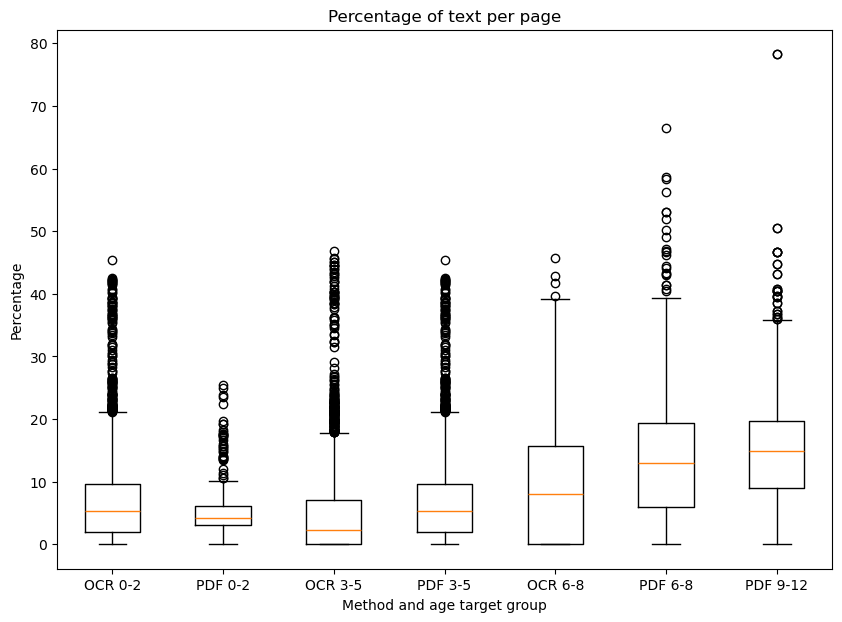

In [22]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot([ocr_coverage_youngest, pdf_coverage_youngest,ocr_coverage_younger, pdf_coverage_younger, ocr_coverage_middle, pdf_coverage_middle, pdf_coverage_old])
x = [1,2,3,4,5,6,7]
x_labels = ['OCR 0-2', 'PDF 0-2','OCR 3-5', 'PDF 3-5', 'OCR 6-8', 'PDF 6-8','PDF 9-12']
plt.xticks(x, x_labels) 
plt.xlabel('Method and age target group')
plt.ylabel('Percentage')
plt.title('Percentage of text per page')
plt.show()

#### Number of pages

In [51]:
df_pdf['Pages'] = df_pdf['Book Parametes'].apply(extract_number_before_pages_or_spreads)

pages_youngest = df_pdf[(df_pdf['Age'] == '0-2') & (~df_pdf['Pages'].isnull()) ]['Pages'].tolist()
pages_younger = df_pdf[(df_pdf['Age'].isin(['3–5', '3-5'])) & (~df_pdf['Pages'].isnull())]['Pages'].tolist()
pages_middle = df_pdf[(df_pdf['Age'].isin(['6–8', '6-8'])) & (~df_pdf['Pages'].isnull())]['Pages'].tolist()
pages_old = df_pdf[(df_pdf['Age'] == '9-12') & (~df_pdf['Pages'].isnull())]['Pages'].tolist()

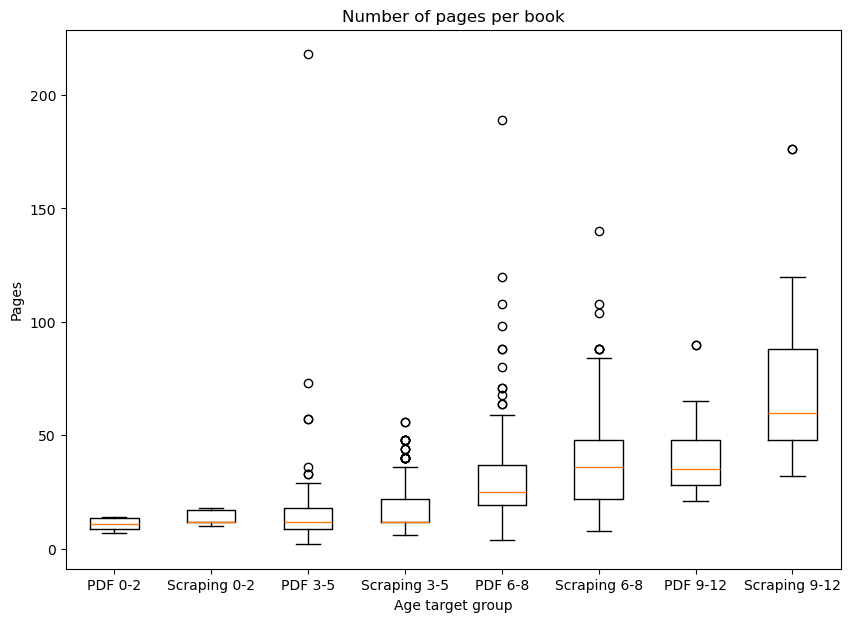

In [52]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot([number_of_pages_youngest, pages_youngest,  number_of_pages_younger, pages_younger, number_of_pages_middle, pages_middle, number_of_pages_old, pages_old])
x = [1,2,3,4, 5,6,7,8]
x_labels = ['PDF 0-2', 'Scraping 0-2', 'PDF 3-5', 'Scraping 3-5', 'PDF 6-8', 'Scraping 6-8', 'PDF 9-12', 'Scraping 9-12']
plt.xticks(x, x_labels) 
plt.xlabel('Age target group')
plt.ylabel('Pages')
plt.title('Number of pages per book')
plt.show()

In [53]:
df_pdf[df_pdf['Pages'].isnull()][['Book Name', 'Book Parametes','Pages', 'PDF Pages']] #~

,Book Name,Book Parametes,Pages,PDF Pages
35,Animal Atlas,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,80
56,Atlas of Ancient Egypt,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,16
57,Atlas of Ancient Greece,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,16
58,Atlas of Ancient Rome,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,16
63,Atlas of Lunar Adventures,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,34
65,Atlas of Rivers,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,36
66,Atlas of the Human Body,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,88
67,Atlas of the Prehistoric World,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,38
69,Atlas of Volcanoes for Children,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,44
182,How the World Works: An Atlas of Connections,"Size 230 × 260 mm, widespreaded 460 × 520 mm, ...",NaN,32
